In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
deliveries=pd.read_csv('G:\ineuron\internship\The spark foundation\ipl\deliveries.csv')   
matches=pd.read_csv('G:\ineuron\internship\The spark foundation\ipl\matches.csv')

In [7]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
 deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
matches.shape

(756, 18)

In [10]:
deliveries.shape

(179078, 21)

In [11]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [12]:
 deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [13]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [50]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [14]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [15]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

 Since umpire3 column will not be using in EDA,removing it completly.

In [16]:
matches.drop(['umpire3'],axis=1,inplace=True) 

In [17]:
matches['umpire2'].fillna(method='pad',inplace=True)
matches['umpire1'].fillna(method='pad',inplace=True)
matches['player_of_match'].fillna(method='pad',inplace=True)
matches['winner'].fillna(method='pad',inplace=True)
matches['city'].fillna(method='pad',inplace=True)

In [18]:
matches['umpire2'].unique()

array(['NJ Llong', 'S Ravi', 'CK Nandan', 'C Shamshuddin', 'AK Chaudhary',
       'Nitin Menon', 'A Deshmukh', 'VK Sharma', 'M Erasmus',
       'CB Gaffaney', 'A Nand Kishore', 'RE Koertzen', 'SL Shastri',
       'GA Pratapkumar', 'DJ Harper', 'K Hariharan', 'RB Tiffin',
       'AM Saheba', 'MR Benson', 'IL Howell', 'AV Jayaprakash',
       'I Shivram', 'BR Doctrove', 'BG Jerling', 'SJ Davis', 'SD Ranade',
       'SJA Taufel', 'TH Wijewardene', 'SK Tarapore', 'HDPK Dharmasena',
       'SS Hazare', 'PR Reiffel', 'AL Hill', 'RJ Tucker', 'VA Kulkarni',
       'JD Cloete', 'BNJ Oxenford', 'S Asnani', 'S Das', 'K Srinath',
       'Subroto Das', 'RK Illingworth', 'PG Pathak', 'K Srinivasan',
       'SD Fry', 'A Nanda Kishore', 'K Ananthapadmanabhan',
       'A.D Deshmukh', 'Vineet Kulkarni', 'Chris Gaffaney', 'Rod Tucker',
       'Nigel Llong', 'Anil Chaudhary', 'O Nandan',
       'Virender Kumar Sharma', 'Yeshwant Barde', 'Anil Dandekar',
       'Kumar Dharmasena', 'KN Anantapadmanabhan', '

In [19]:
deliveries.fillna(0,inplace=True)

!!!!!!!!!!!!!!!!!!!!Done with null values!!!!!!!!!!!!

In [20]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [21]:
matches['season'].nunique()

12

In [22]:
matches['city'].value_counts()   ## number of matches played in city

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Sharjah            10
Abu Dhabi          10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

<AxesSubplot:>

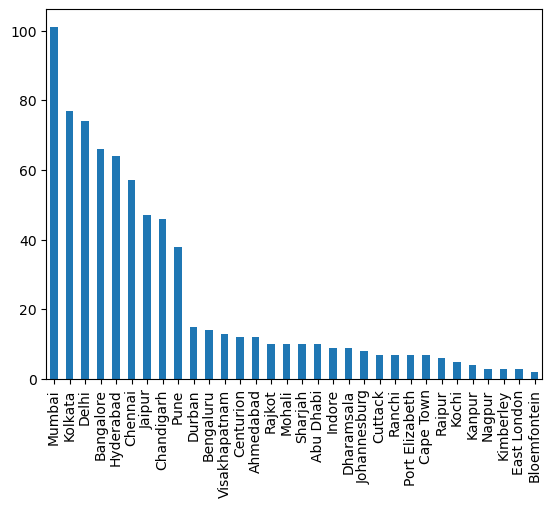

In [23]:
matches['city'].value_counts().plot(kind='bar')

In [ ]:
highest number of matches played in mumbai

In [25]:
matches['player_of_match'].value_counts().head()  ## max times player of the match

CH Gayle          21
AB de Villiers    20
DA Warner         18
RG Sharma         17
MS Dhoni          17
Name: player_of_match, dtype: int64

In [ ]:
## each season winner team

In [33]:
matches.drop_duplicates('season',keep='last')[['season','winner']].sort_values('season')

,season,winner
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad
58,2017,Mumbai Indians


In [34]:
matches['season'].value_counts()   ## number of matches played in particular season

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

<AxesSubplot:>

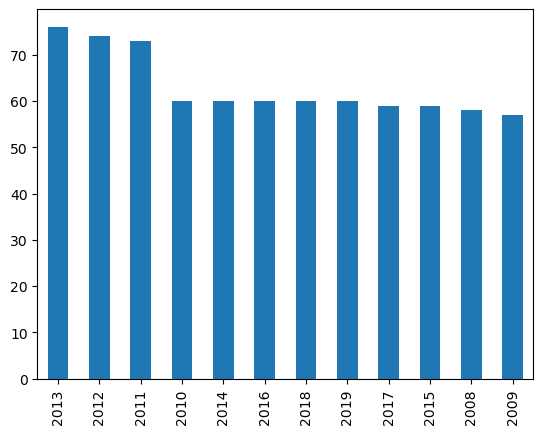

In [35]:
matches['season'].value_counts().plot(kind='bar')

In [54]:
city=matches.groupby('city')

In [56]:
city.get_group('Mumbai')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan
15,16,2017,Mumbai,2017-04-16,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi
27,28,2017,Mumbai,2017-04-24,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians,field,normal,0,Rising Pune Supergiant,3,0,BA Stokes,Wankhede Stadium,A Nand Kishore,S Ravi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,11315,2019,Mumbai,10/04/19,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,3,KA Pollard,Wankhede Stadium,Yeshwant Barde,S Ravi
722,11318,2019,Mumbai,13/04/19,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,JC Buttler,Wankhede Stadium,Nitin Menon,Nanda Kishore
726,11322,2019,Mumbai,15/04/19,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SL Malinga,Wankhede Stadium,Marais Erasmus,Nitin Menon
746,11342,2019,Mumbai,02/05/19,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan


In [58]:
new_df=deliveries.merge(matches,left_on='match_id',right_on='id')

In [60]:
new_df.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


In [101]:
team_won_match=matches['winner'].value_counts() ## number of times team won the match

In [105]:
match_winning_ratio=((matches['winner'].value_counts())/(matches['team1'].value_counts() + matches['team2'].value_counts()))

<AxesSubplot:>

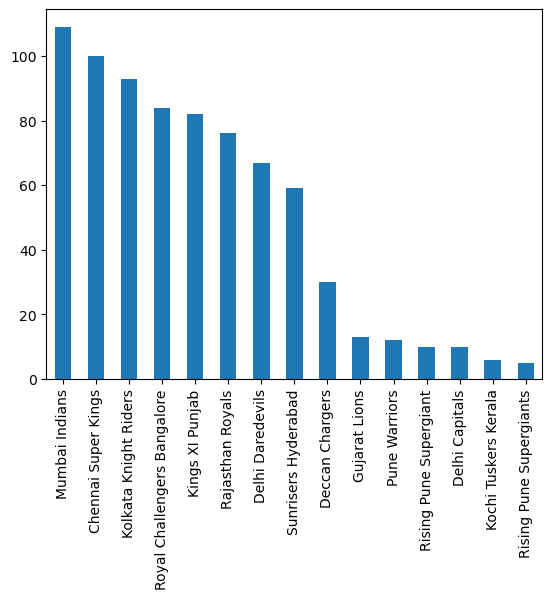

In [108]:
team_won_match.plot(kind='bar')

mumbai indians won largest number of matches followed by chennai super kings and kolkata knight riders

In [111]:
 deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
runs=deliveries.groupby('batsman')

In [118]:
runs.get_group('DA Warner').head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
runs['batsman_runs'].sum().sort_values(ascending=False).head(10)  ## top 5 batsman by total runs

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

<AxesSubplot:xlabel='batsman'>

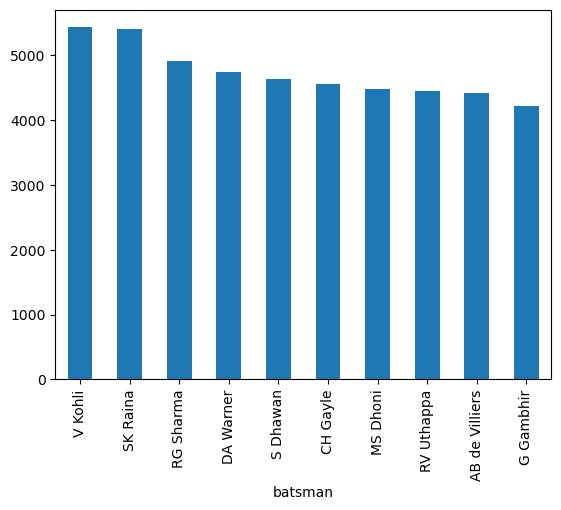

In [127]:
runs['batsman_runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

In [155]:
runs['batsman_runs'].count().sort_values(ascending=False).head(10)     ## number of balls played by batsman

batsman
V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3776
G Gambhir     3524
RV Uthappa    3492
DA Warner     3398
MS Dhoni      3318
AM Rahane     3215
CH Gayle      3131
Name: batsman_runs, dtype: int64

<AxesSubplot:xlabel='batsman'>

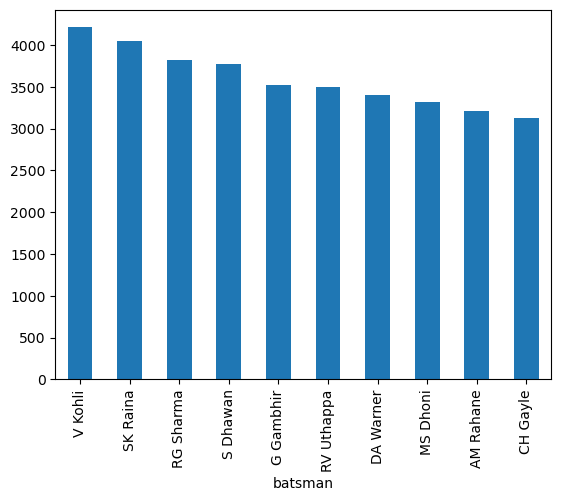

In [134]:
runs['batsman_runs'].count().sort_values(ascending=False).head(10).plot(kind='bar')  ## number of balls played by batsman

In [144]:
deliveries[deliveries['batsman_runs']==4].shape[0]  ## total no. of 4's in ipl

20392

In [145]:
deliveries[deliveries['batsman_runs']==6].shape[0]  ## total no. of 6's in ipl

8170

In [146]:
deliveries[deliveries['batsman_runs']==3].shape[0]  ## total no. of 3's in ipl

587

In [148]:
deliveries[deliveries['batsman_runs']==4].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10)

batsman
S Dhawan      526
SK Raina      495
G Gambhir     492
V Kohli       482
DA Warner     459
RV Uthappa    436
RG Sharma     431
AM Rahane     405
CH Gayle      376
PA Patel      366
Name: batsman_runs, dtype: int64

<AxesSubplot:ylabel='batsman_runs'>

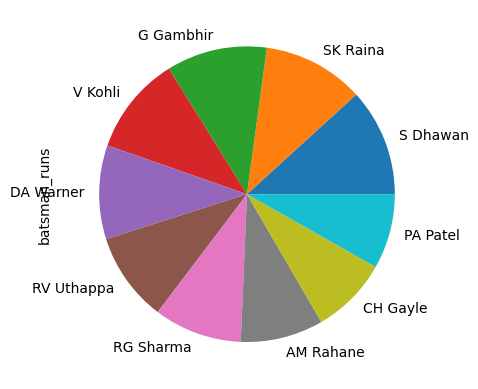

In [150]:
deliveries[deliveries['batsman_runs']==4].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10).plot(kind='pie')

In [152]:
deliveries[deliveries['batsman_runs']==3].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10)

batsman
S Dhawan          18
DA Warner         18
M Vijay           17
AM Rahane         15
AB de Villiers    15
G Gambhir         15
MS Dhoni          14
RV Uthappa        13
V Kohli           11
SV Samson         11
Name: batsman_runs, dtype: int64

In [171]:
def runs_scored (batsman_name):
    return deliveries[deliveries['batsman']==batsman_name].groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).head(3)

In [173]:
runs_scored('S Dhawan') ## max runs scored by 'S dhawan' against bowling_team

bowling_team
Mumbai Indians           673
Kolkata Knight Riders    660
Chennai Super Kings      651
Name: batsman_runs, dtype: int64

<AxesSubplot:ylabel='batsman_runs'>

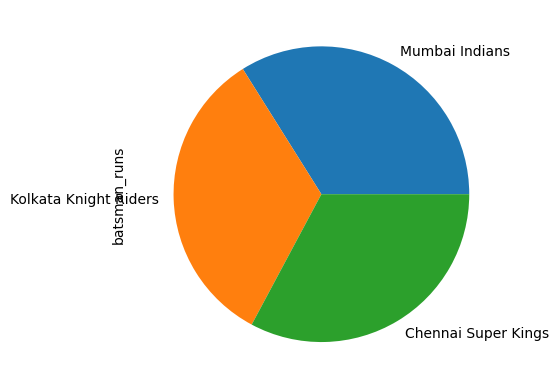

In [174]:
runs_scored('S Dhawan').plot(kind='pie')